In [71]:
#アヤメの分類を行いたい

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

#準備
# データロード
iris = datasets.load_iris()

# 説明変数(萼片（sepals）と花びら（petals）の長さと幅の4つ)
X = iris.data
X = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

# 目的変数(3種類のアヤメの名前)
Y = iris.target
Y = pd.DataFrame(Y, columns = ["Species"])

# 学習データとテストデータ分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, shuffle=True, random_state=3)
#X_trainにデータの70%が、X_testに残りの30%が含まれる

In [72]:
# モデル設定と訓練データを使った学習
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # 決定木モデル（最大深さ3）
clf = clf.fit(X_train, Y_train) # 訓練データで学習

/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecat

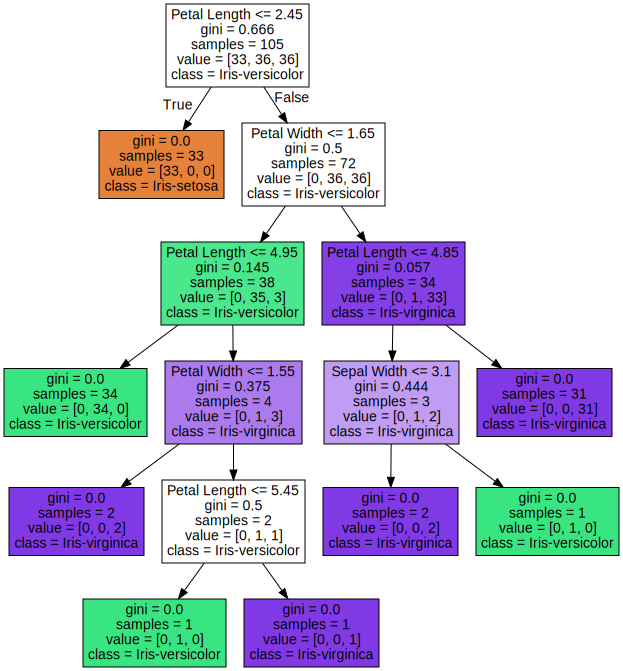

In [73]:
#決定木の可視化(graphvizバージョン)

import graphviz
from sklearn import tree

# 可視化設定
viz = tree.export_graphviz(tree_model,                                      # 決定木モデル           
           feature_names=X_train.columns.tolist(),                          # 説明変数項目名
           class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],  # 正解ラベル名
           filled=True,                                                     # 枠内の色塗り有無
                               )

# グラフ描画
graph = graphviz.Source(viz, format="png") 
graph

/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


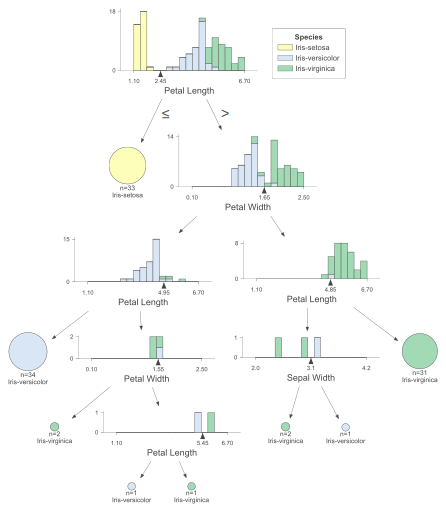

In [75]:
# 可視化(dtreezバージョン)
import dtreeviz

# 可視化設定
viz = dtreeviz.model(tree_model,                                                        # 決定木モデル
                X_train,                                                          # 説明変数（dataframe形式）
                Y_train["Species"],                                               # 正解ラベル(Series形式)
                feature_names = X_train.columns.tolist(),                         # 説明変数項目名
                target_name = "Species",                                          # 正解ラベル項目名 
                class_names = ["Iris-setosa","Iris-versicolor","Iris-virginica"]  # 正解ラベル名
)

# 可視化
viz.view()

In [68]:
# 推論
Y_pred_tree = tree_model.predict(X_test)

# 出力
print(Y_pred_tree)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]


/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [69]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 混合行列
cf_mat = confusion_matrix(Y_test, Y_pred_tree)

# 出力
print(f'正解率: {accuracy_score(Y_test, Y_pred_tree)}')
print('混合行列')
print(cf_mat)

正解率: 0.9777777777777777
混合行列
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecat